In [2]:
library(tidyverse)
library(Seurat)
library(anndata)
library(gplots)
library(dplyr)
library(plyr)
options(repr.plot.width=20, repr.plot.height=12)


In [3]:
df_prob_rep <- read_csv("/faststorage/project/jsp_student_projects/miRNA_DGD_DE_F2024/data/plot_mat/df_prob_rep.csv")

In [4]:
df <- as.data.frame(df_prob_rep)
head(df)
dim(df)

,,0,1,2,3,4,5,6,7,8,⋯,37,38,39,40,41,42,43,44,max_prob_density,max_prob_density_comp
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,⋯,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0000e+00,3.033369e-35,28
1,1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.384843e-43,0.000000e+00,⋯,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0000e+00,2.788366e-29,28
2,2,0.000000e+00,5.058687e-43,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.752456e-39,1.214958e-39,0.000000e+00,⋯,0.000000e+00,1.765636e-43,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.945528e-35,0.0000e+00,2.348375e-19,28
3,3,9.919003e-23,1.241057e-18,6.372174e-29,1.124142e-14,1.641039e-25,4.053522e-29,6.540121e-24,4.977422e-22,6.624706e-34,⋯,9.063343e-39,2.455727e-21,1.665631e-15,9.126931e-26,4.412933e-29,8.804802e-29,4.638433e-14,5.8137e-27,1.136999e-09,13
4,4,1.342226e-13,1.893547e-35,2.073639e-38,1.012956e-33,2.567697e-28,0.000000e+00,2.662467e-44,5.856026e-42,0.000000e+00,⋯,0.000000e+00,0.000000e+00,4.657812e-26,8.660025e-43,0.000000e+00,0.000000e+00,2.703796e-09,0.0000e+00,2.703796e-09,43
5,5,6.935393e-03,9.191380e-29,8.545246e-21,8.875647e-23,1.398737e-25,0.000000e+00,9.758592e-31,4.743669e-33,7.883887e-40,⋯,2.802597e-45,3.846236e-31,2.905208e-23,5.964229e-34,0.000000e+00,1.621076e-36,1.144932e+04,0.0000e+00,1.144932e+04,43


[1] 10682    48

## Association table

In [6]:
dim(df)
head(df) %>%
    select("max_prob_density_comp")


[1] 10682    48

,max_prob_density_comp
,<dbl>
0,28
1,28
2,28
3,13
4,43
5,43


In [7]:
data_anno <- readRDS("/faststorage/project/jsp_student_projects/shared_data/TCGA_counts/TCGA_sample_anno_match.rds")
dim(data_anno)
head(data_anno)

[1] 10682    13

,sample_id,cancer_type,sample_submitter_id,cancer_name,primary_site,sample_type,tissue_type,tumor_descriptor,age_at_index,gender,vital_status,tissue_or_organ_of_origin,color
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,TCGA-EW-A6SA-01A-21R-A32P-07,BRCA,TCGA-EW-A6SA-01A,Breast Invasive Carcinoma,Breast,Primary Tumor,Tumor,Primary,59,male,Alive,"Breast, NOS",#ED1E91
2,TCGA-E2-A14W-01A-11R-A12D-07,BRCA,TCGA-E2-A14W-01A,Breast Invasive Carcinoma,Breast,Primary Tumor,Tumor,Primary,78,male,Alive,"Breast, NOS",#ED1E91
3,TCGA-EW-A1PD-01A-11R-A144-07,BRCA,TCGA-EW-A1PD-01A,Breast Invasive Carcinoma,Breast,Primary Tumor,Tumor,Primary,61,male,Alive,"Breast, NOS",#ED1E91
4,TCGA-55-1594-01A-01R-0946-07,LUAD,TCGA-55-1594-01A,Lung Adenocarcinoma,Lung,Primary Tumor,Tumor,Primary,68,male,Alive,"Lower lobe, lung",#D2C3DF
5,TCGA-49-6742-11A-01R-1858-07,LUAD,TCGA-49-6742-11A,Lung Adenocarcinoma,Lung,Solid Tissue Normal,Normal,Not Applicable,70,male,Dead,"Upper lobe, lung",#D2C3DF
6,TCGA-50-5932-11A-01R-1755-07,LUAD,TCGA-50-5932-11A,Lung Adenocarcinoma,Lung,Solid Tissue Normal,Normal,Not Applicable,75,male,Dead,"Upper lobe, lung",#D2C3DF


In [8]:
plot_df <- cbind(
    df %>%
        select("max_prob_density_comp"),
    data_anno #%>%
        #select("primary_site", "cancer_type")

)
head(plot_df)

,max_prob_density_comp,sample_id,cancer_type,sample_submitter_id,cancer_name,primary_site,sample_type,tissue_type,tumor_descriptor,age_at_index,gender,vital_status,tissue_or_organ_of_origin,color
,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
0,28,TCGA-EW-A6SA-01A-21R-A32P-07,BRCA,TCGA-EW-A6SA-01A,Breast Invasive Carcinoma,Breast,Primary Tumor,Tumor,Primary,59,male,Alive,"Breast, NOS",#ED1E91
1,28,TCGA-E2-A14W-01A-11R-A12D-07,BRCA,TCGA-E2-A14W-01A,Breast Invasive Carcinoma,Breast,Primary Tumor,Tumor,Primary,78,male,Alive,"Breast, NOS",#ED1E91
2,28,TCGA-EW-A1PD-01A-11R-A144-07,BRCA,TCGA-EW-A1PD-01A,Breast Invasive Carcinoma,Breast,Primary Tumor,Tumor,Primary,61,male,Alive,"Breast, NOS",#ED1E91
3,13,TCGA-55-1594-01A-01R-0946-07,LUAD,TCGA-55-1594-01A,Lung Adenocarcinoma,Lung,Primary Tumor,Tumor,Primary,68,male,Alive,"Lower lobe, lung",#D2C3DF
4,43,TCGA-49-6742-11A-01R-1858-07,LUAD,TCGA-49-6742-11A,Lung Adenocarcinoma,Lung,Solid Tissue Normal,Normal,Not Applicable,70,male,Dead,"Upper lobe, lung",#D2C3DF
5,43,TCGA-50-5932-11A-01R-1755-07,LUAD,TCGA-50-5932-11A,Lung Adenocarcinoma,Lung,Solid Tissue Normal,Normal,Not Applicable,75,male,Dead,"Upper lobe, lung",#D2C3DF


In [ ]:
# If look only at normal
#plot_df <- plot_df %>%
#    filter(tissue_type == "Normal")

In [10]:
plot_df <- readRDS("/home/elisalaegsgaard/jsp_student_projects/miRNA_DGD_DE_F2024/data/annotation_with_component_info.rds")

In [11]:
#dim(as.data.frame(max_association_percent))
dim(plot_df)
#plot_df <- cbind(plot_df,as.data.frame(max_association_percent))
head(plot_df)

[1] 10682    18

,max_prob_density_comp,primary_site,comp_name_ours,sample_id,cancer_type,sample_submitter_id,cancer_name,sample_type,tissue_type,tumor_descriptor,age_at_index,gender,vital_status,tissue_or_organ_of_origin,color,comp_name,max_association_percent,max_prob_density
,<dbl>,<chr>,<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,0,Skin,Skin,TCGA-DA-A1I0-06A-11R-A20F-07,SKCM,TCGA-DA-A1I0-06A,Skin Cutaneous Melanoma,Metastatic,Tumor,Metastatic,63,male,Dead,"Skin, NOS",#BAD543,Lung,-Inf,3.033369e-35
2,0,Skin,Skin,TCGA-DA-A3F2-06A-11R-A20F-07,SKCM,TCGA-DA-A3F2-06A,Skin Cutaneous Melanoma,Metastatic,Tumor,Metastatic,55,male,Dead,"Skin, NOS",#BAD543,Lung,-Inf,2.788366e-29
3,0,Skin,Skin,TCGA-BF-A5ER-01A-12R-A27Q-07,SKCM,TCGA-BF-A5ER-01A,Skin Cutaneous Melanoma,Primary Tumor,Tumor,Primary,63,male,Alive,"Skin, NOS",#BAD543,Lung,-Inf,2.348375e-19
4,0,Skin,Skin,TCGA-QB-A6FS-06A-11R-A311-07,SKCM,TCGA-QB-A6FS-06A,Skin Cutaneous Melanoma,Metastatic,Tumor,Metastatic,49,male,Alive,"Skin, NOS",#BAD543,Lung,-Inf,1.136999e-09
5,0,Skin,Skin,TCGA-D3-A2JK-06A-11R-A18S-07,SKCM,TCGA-D3-A2JK-06A,Skin Cutaneous Melanoma,Metastatic,Tumor,Metastatic,24,male,Dead,"Skin, NOS",#BAD543,Lung,-Inf,2.703796e-09
6,0,Skin,Skin,TCGA-D3-A2J8-06A-11R-A18T-07,SKCM,TCGA-D3-A2J8-06A,Skin Cutaneous Melanoma,Metastatic,Tumor,Metastatic,48,male,Dead,"Skin, NOS",#BAD543,Lung,-Inf,1.144932e+04


In [12]:
tab <- table(plot_df$primary_site,plot_df$max_prob_density_comp)

In [13]:
sliced_by_density <- plot_df%>%
    filter(max_prob_density >0.01) 
tab <- table(sliced_by_density$primary_site,sliced_by_density$comp_name)

In [14]:
prob_tab <- prop.table(tab, margin = 1)


In [15]:
dim(prob_tab)

[1] 26 25

In [16]:
print(ftable(prob_tab))
df_result <- as.data.frame.table(prob_tab)


                   Adipose Adrenal Gland      Artery       Brain      Breast       Cells       Colon   Esophagus       Heart      Kidney       Liver        Lung Minor Salivary Gland      Muscle       Nerve       Ovary    Pancreas    Prostate        Skin Small Intestine      Spleen     Stomach      Testis     Thyroid      Vagina
                                                                                                                                                                                                                                                                                                                                         
Adrenal Gland  0.022727273   0.772727273 0.000000000 0.204545455 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000          0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000     0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
Bile Duct 

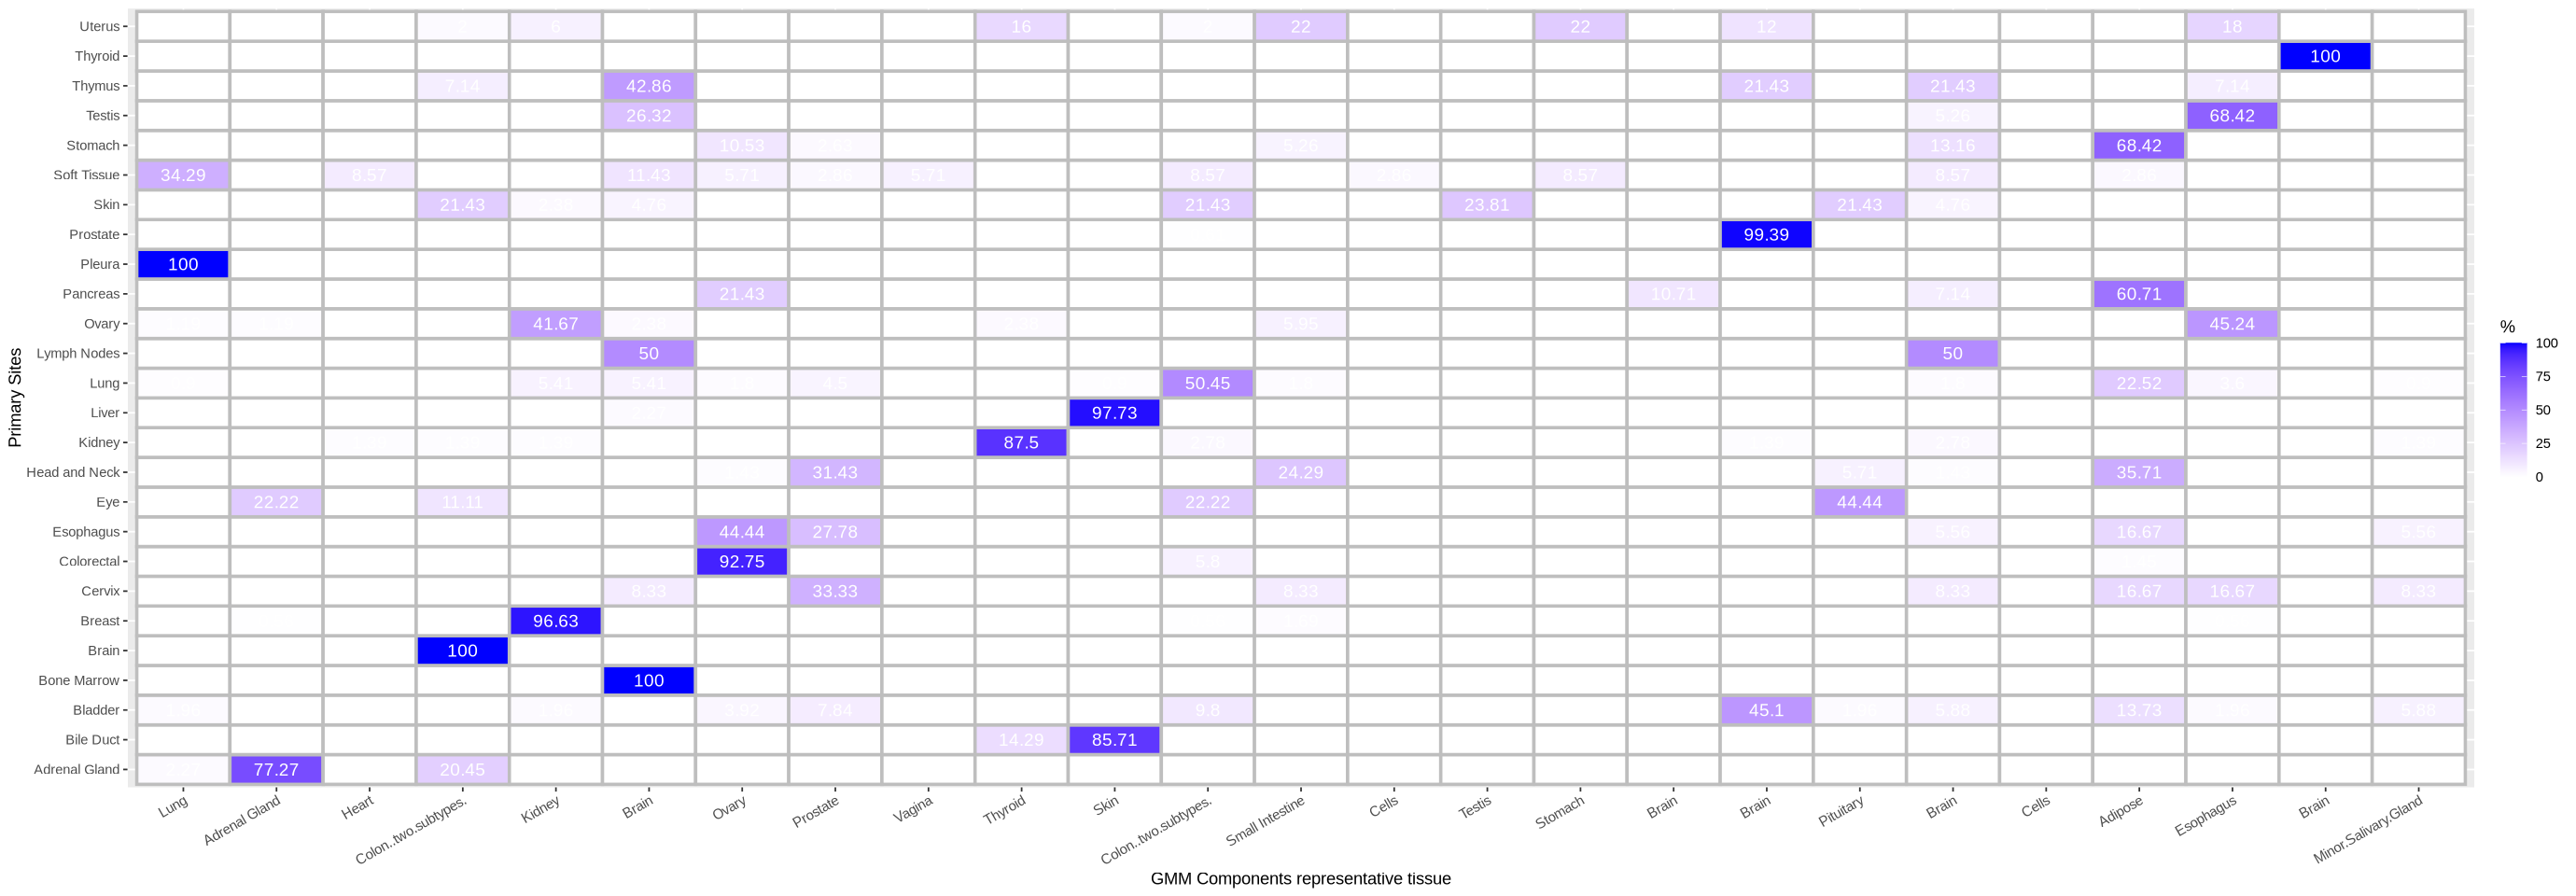

In [30]:
options(repr.plot.width = 23, repr.plot.height = 8) #

df_result %>%
  ggplot(aes(Var2, Var1, fill = Freq*100)) +
      geom_tile(color = "grey",
            lwd = 1,
            linetype = 1) +
  geom_text(aes(label = round(Freq*100,2)), color = "white", size = 4)+
  scale_fill_gradient(low = "white", high = "blue") +
  scale_x_discrete(labels = result$comp_name) +
  theme(axis.text.x = element_text(angle = 30, hjust = 1))+
  labs(x = "GMM Components representative tissue", y = "Primary Sites", fill = "%")

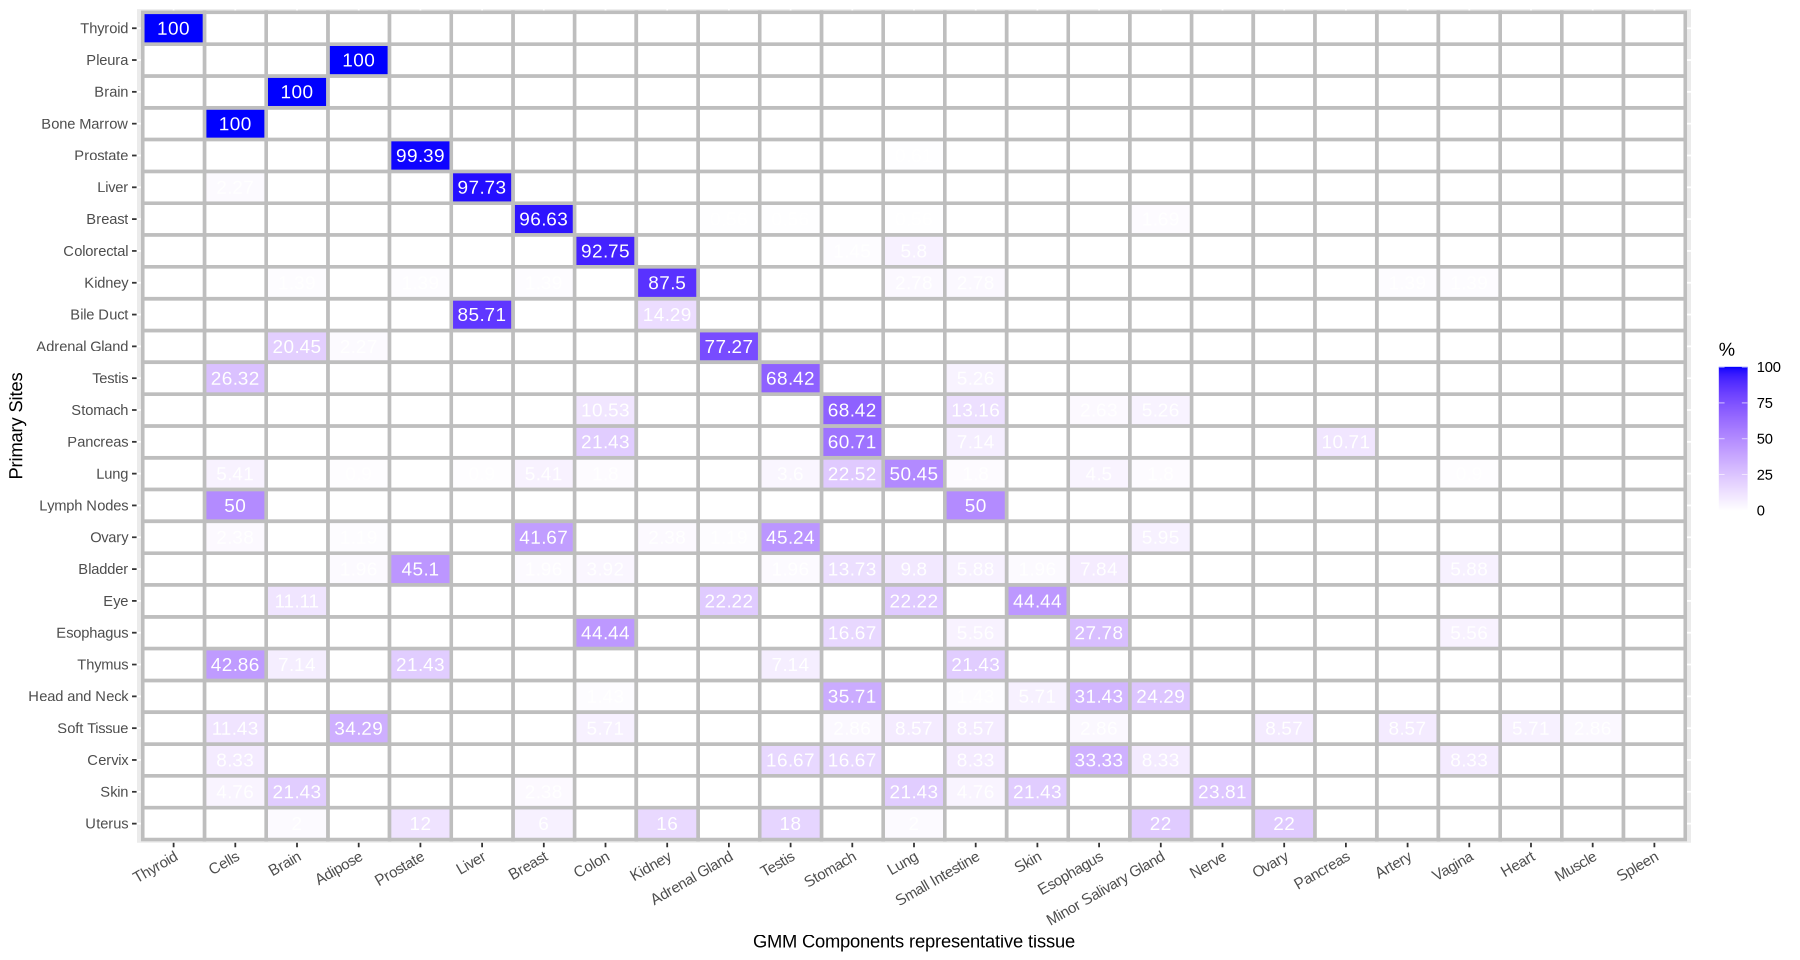

In [18]:
options(repr.plot.width = 15, repr.plot.height = 8) #

df_result %>%
mutate(Var2 = fct_reorder(Var2, Freq, .fun= "max")) %>%
mutate(Var1 = fct_reorder(Var1, Freq, .fun="max")) %>%
  ggplot(aes(fct_rev(Var2), Var1, fill = Freq*100)) +
      geom_tile(color = "grey",
            lwd = 1,
            linetype = 1) +
  geom_text(aes(label = round(Freq*100,2)), color = "white", size = 4)+
  scale_fill_gradient(low = "white", high = "blue") +
  theme(axis.text.x = element_text(angle = 30, hjust = 1))+
  labs(x = "GMM Components representative tissue", y = "Primary Sites", fill = "%")


In [40]:
as.data.frame(rowSums(tab))


,rowSums(tab)
,<dbl>
Adrenal Gland,266
Bile Duct,45
Bladder,422
Bone Marrow,121
Brain,527
Breast,1178
Cervix,309
Colorectal,607
Esophagus,197


## Normal vs Tumor

In [20]:
normal_plot_df <- plot_df %>%
    filter(tissue_type == "Normal")


tumor_plot_df <- plot_df %>%
    filter(tissue_type == "Tumor")

In [24]:
normal_tab <- table(
    normal_plot_df$primary_site,
    normal_plot_df$comp_name
    )

tumor_tab <- table(
    tumor_plot_df$primary_site,
    tumor_plot_df$comp_name
    )

normal_prob_tab <- prop.table(normal_tab, margin = 1)
tumor_prob_tab <- prop.table(tumor_tab, margin = 1)

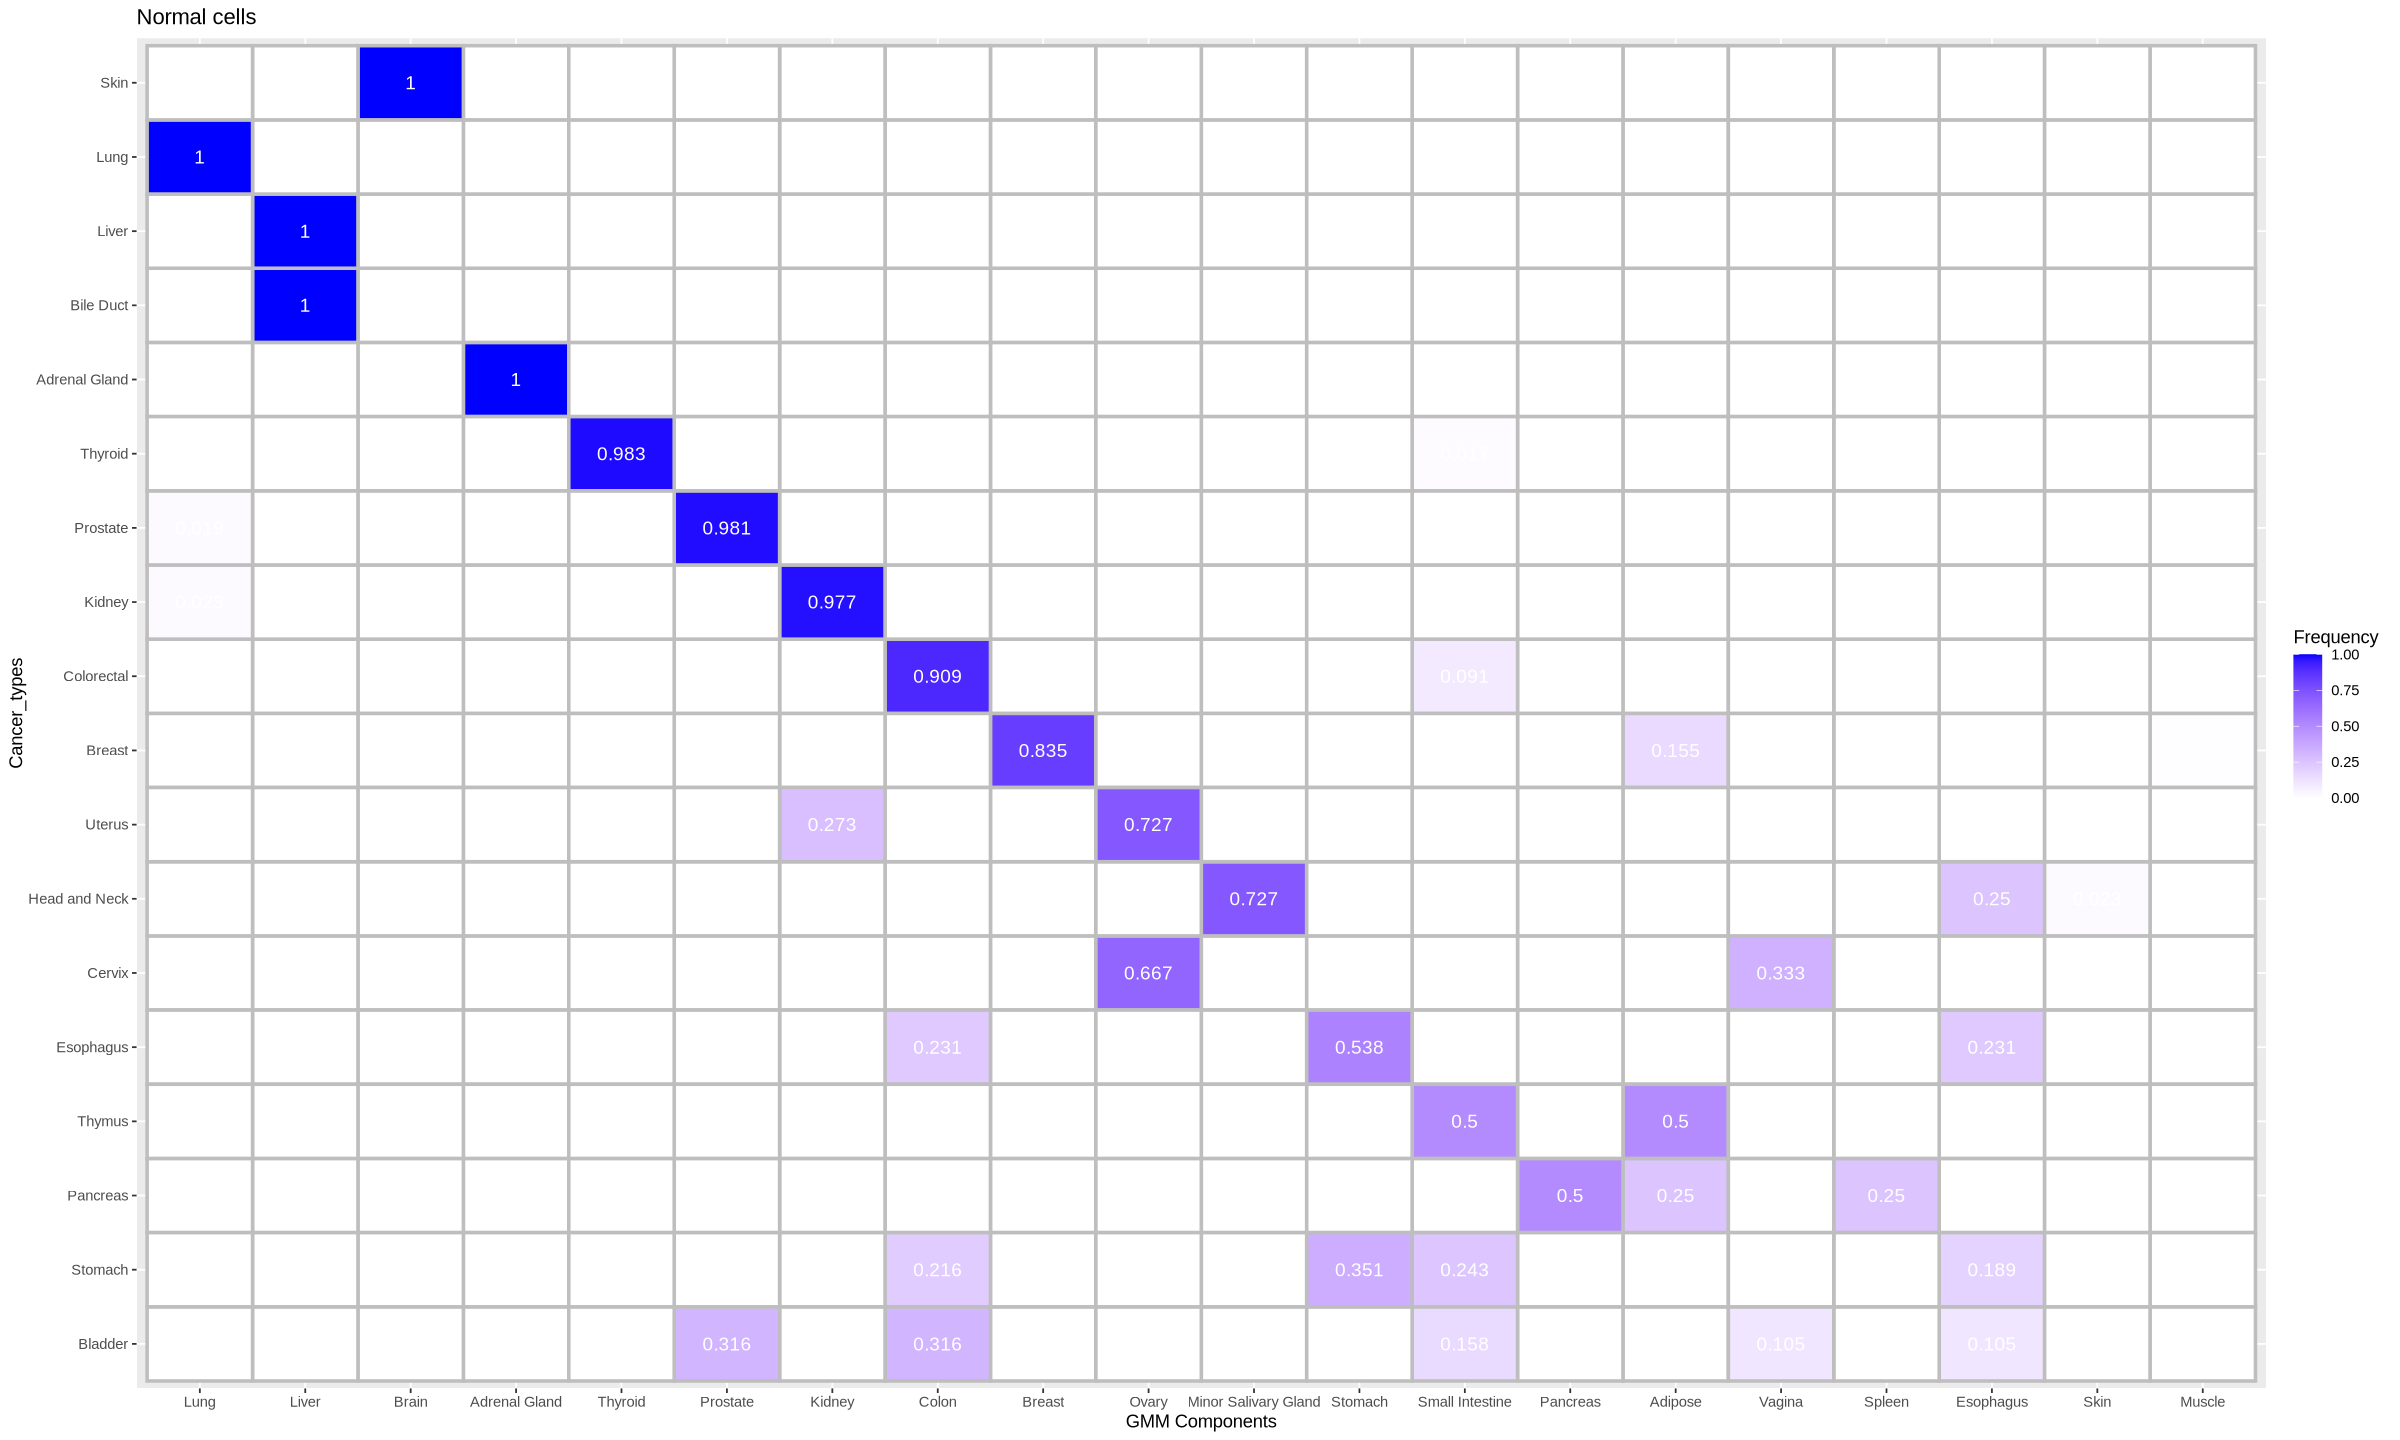

In [25]:
normal <- as.data.frame.table(normal_prob_tab)

#normal$Var2 <- factor(x = normal$Var2,
#                        levels = order(normal$Freq), 
#                        ordered = TRUE)
normal %>%
mutate(Var2 = fct_reorder(Var2, Freq, .fun= "max")) %>%
mutate(Var1 = fct_reorder(Var1, Freq, .fun="max")) %>%
  ggplot(aes(fct_rev(Var2), Var1, fill = Freq)) +
      geom_tile(color = "grey",
            lwd = 1,
            linetype = 1) +
  geom_text(aes(label = round(Freq,3)), color = "white", size = 4)+
  scale_fill_gradient(low = "white", high = "blue") +
  labs(title = "Normal cells",x = "GMM Components", y = "Cancer_types", fill = "Frequency")

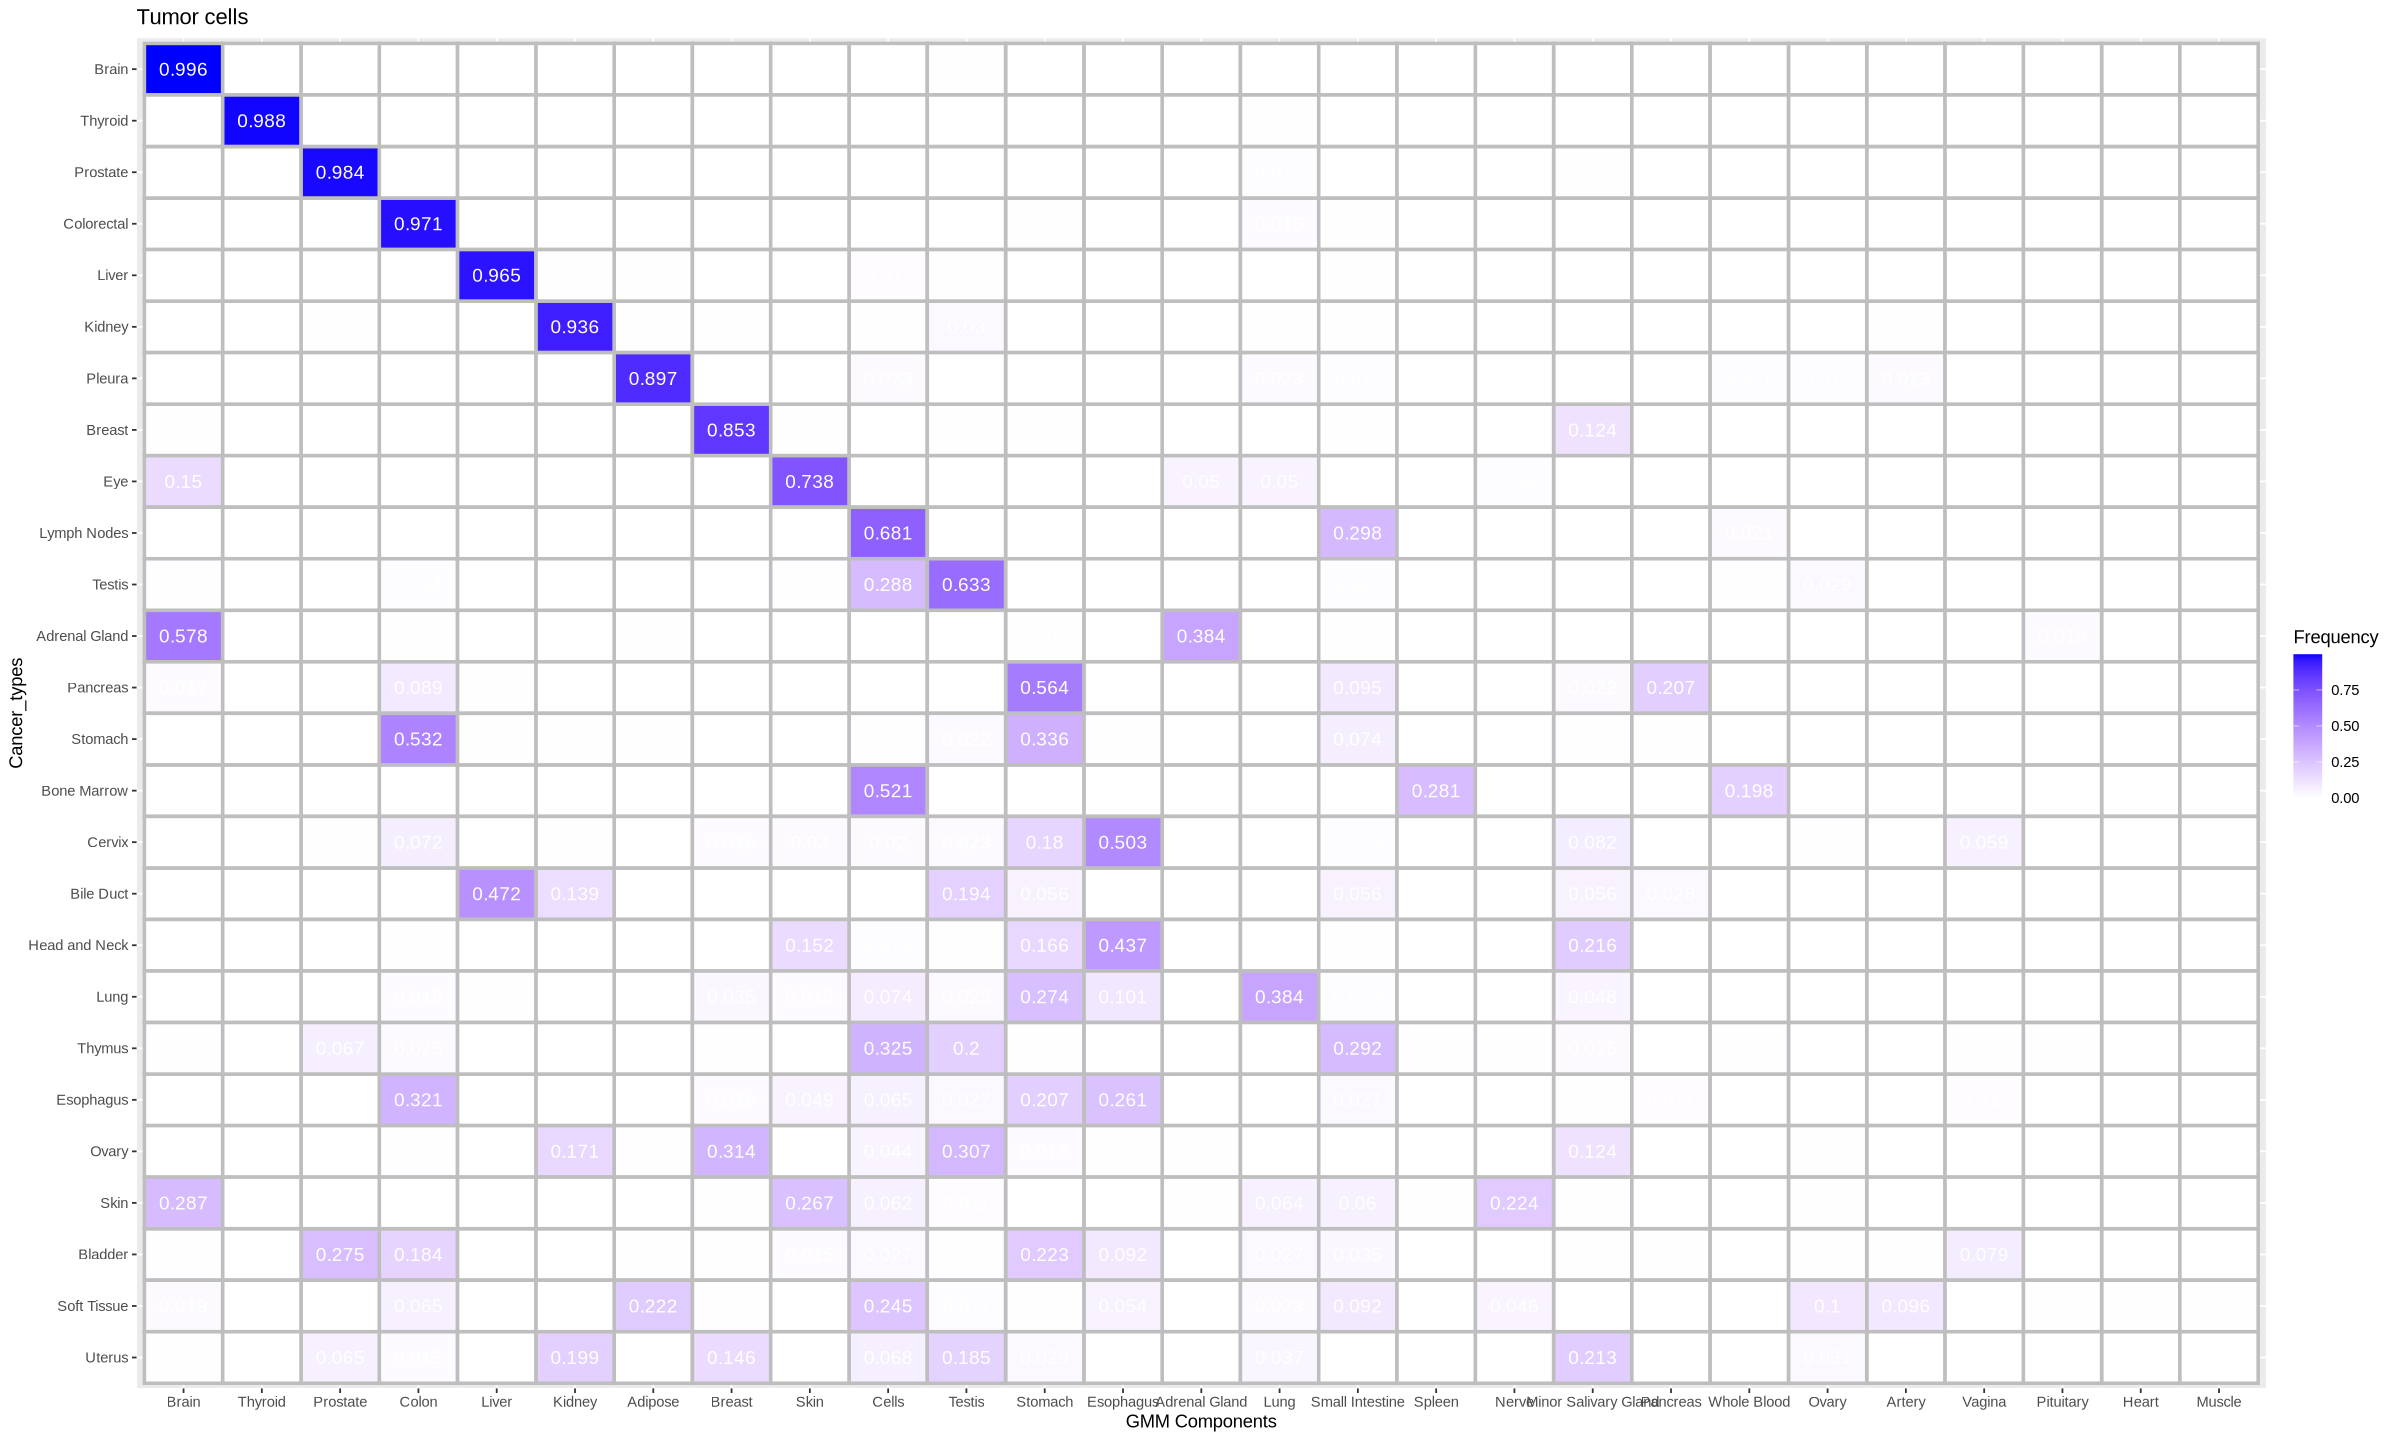

In [26]:
tumor <- as.data.frame.table(tumor_prob_tab)
tumor %>%
mutate(Var2 = fct_reorder(Var2, Freq, .fun= "max")) %>%
mutate(Var1 = fct_reorder(Var1, Freq, .fun="max")) %>%
  ggplot(aes(fct_rev(Var2), Var1, fill = Freq)) +
      geom_tile(color = "grey",
            lwd = 1,
            linetype = 1) +
  geom_text(aes(label = round(Freq,3)), color = "white", size = 4)+
  scale_fill_gradient(low = "white", high = "blue") +
  labs(title = "Tumor cells", x = "GMM Components", y = "Cancer_types", fill = "Frequency")

## Matching component associated tissue types to primary site names in TCGA

In [22]:
comp <- read.table("/faststorage/jsp_student_projects/miRNA_DGD_DE_F2024/data/GMM-Clusters-fractions_45_Train.csv", header = TRUE, sep = "	")

In [19]:
length(unique(plot_df$primary_site))
length(unique(plot_df$comp_name))
unique(plot_df$comp_name)
unique(plot_df$primary_site)

length(intersect(plot_df$primary_site,plot_df$comp_name))

[1] 27

[1] 27

[1] "Lung"                 "Adrenal Gland"        "Heart"               
 [4] "Colon"                "Kidney"               "Brain"               
 [7] "Ovary"                "Prostate"             "Vagina"              
[10] "Thyroid"              "Skin"                 "Small Intestine"     
[13] "Cells"                "Testis"               "Stomach"             
[16] "Pituitary"            "Adipose"              "Esophagus"           
[19] "Minor Salivary Gland" "Nerve"                "Breast"              
[22] "Whole Blood"          "Spleen"               "Artery"              
[25] "Muscle"               "Liver"                "Pancreas"

[1] "Skin"          "Soft Tissue"   "Colorectal"    "Kidney"       
 [5] "Prostate"      "Bladder"       "Eye"           "Lung"         
 [9] "Uterus"        "Pleura"        "Breast"        "Adrenal Gland"
[13] "Thyroid"       "Ovary"         "Stomach"       "Thymus"       
[17] "Head and Neck" "Pancreas"      "Esophagus"     "Cervix"       
[21] "Bile Duct"     NA              "Liver"         "Testis"       
[25] "Brain"         "Lymph Nodes"   "Bone Marrow"

[1] 14

In [20]:
component_matches <- data.frame(
    comp_name = c("Adrenal.Gland", "Bladder", "Brain..thirteen.subtypes.","Breast", "Cervix..two.subtypes.", "Colon..two.subtypes.", "Esophagus..three.subtypes.", "Kidney..two.subtypes.", "Liver", "Lung","Ovary", "Pancreas", "Prostate", "Skin..two.subtypes.", "Stomach", "Testis","Thyroid","Uterus"),
    data_name = c("Adrenal Gland", "Bladder", "Brain", "Breast", "Cervix", "Colorectal", "Esophagus", "Kidney", "Liver", "Lung", "Ovary", "Pancreas", "Prostate", "Skin", "Stomach", "Testis",  "Thyroid", "Uterus")
)

In [23]:
comp

Component.Tissue,Adipose..two.subtypes.,Artery..three.subtypes.,Adrenal.Gland,Brain..thirteen.subtypes.,Breast,Bladder,Cells..three.subtypes.,Colon..two.subtypes.,Cervix..two.subtypes.,⋯,Spleen,Stomach,Small.Intestine,Skin..two.subtypes.,Thyroid,Testis,Uterus,Vagina,Whole.Blood,Total
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
0,NA,NA,0.5,0.9,NA,NA,NA,0.9,NA,⋯,NA,NA,NA,0.5,0.5,NA,NA,NA,0.5,219
1,NA,NA,99.6,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,245
2,NA,0.6,NA,NA,NA,NA,NA,0.4,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,849
3,NA,NA,NA,NA,0.4,NA,NA,97.9,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,242
4,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,89
5,NA,NA,NA,100.0,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,231
6,NA,NA,NA,NA,NA,NA,NA,NA,2.8,⋯,NA,NA,NA,NA,NA,NA,40.5,0.9,NA,316
7,NA,NA,NA,NA,NA,4.9,NA,NA,1.2,⋯,NA,NA,NA,NA,NA,NA,0.4,0.8,NA,244
8,NA,NA,NA,NA,NA,NA,NA,NA,2.8,⋯,NA,NA,NA,NA,NA,NA,0.7,95.7,NA,141


In [24]:
# Get the column names of the maximum values
comp <- comp[,-ncol(comp)]
comp <- comp[,-1]
head(comp)
comp_name <- colnames(comp)[max.col(replace(comp, is.na(comp), -Inf), 'first')]
result <- cbind(1:nrow(comp)-1, comp_name)
print(result)
result <- as.data.frame(result)
#result<- subset(result, comp_name %in% c("Component.Tissue","Adrenal.Gland", "Bladder", "Brain..thirteen.subtypes.","Breast", "Cervix..two.subtypes.", "Colon..two.subtypes.", "Esophagus..three.subtypes.", "Kidney..two.subtypes.", "Liver", "Ovary", "Pancreas", "Lung", "Prostate", "Skin..two.subtypes.", "Stomach", "Testis","Thyroid","Uterus"))

unique(result$comp_name)

,Adipose..two.subtypes.,Artery..three.subtypes.,Adrenal.Gland,Brain..thirteen.subtypes.,Breast,Bladder,Cells..three.subtypes.,Colon..two.subtypes.,Cervix..two.subtypes.,Esophagus..three.subtypes.,⋯,Pancreas,Spleen,Stomach,Small.Intestine,Skin..two.subtypes.,Thyroid,Testis,Uterus,Vagina,Whole.Blood
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,NA,NA,0.5,0.9,NA,NA,NA,0.9,NA,NA,⋯,NA,NA,NA,NA,0.5,0.5,NA,NA,NA,0.5
2,NA,NA,99.6,NA,NA,NA,NA,NA,NA,0.4,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,NA,0.6,NA,NA,NA,NA,NA,0.4,NA,0.1,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,NA,NA,NA,NA,0.4,NA,NA,97.9,NA,0.4,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,NA,NA,NA,100.0,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


           comp_name                   
 [1,] "0"  "Lung"                      
 [2,] "1"  "Adrenal.Gland"             
 [3,] "2"  "Heart..two.subtypes."      
 [4,] "3"  "Colon..two.subtypes."      
 [5,] "4"  "Kidney..two.subtypes."     
 [6,] "5"  "Brain..thirteen.subtypes." 
 [7,] "6"  "Ovary"                     
 [8,] "7"  "Prostate"                  
 [9,] "8"  "Vagina"                    
[10,] "9"  "Thyroid"                   
[11,] "10" "Skin..two.subtypes."       
[12,] "11" "Colon..two.subtypes."      
[13,] "12" "Small.Intestine"           
[14,] "13" "Cells..three.subtypes."    
[15,] "14" "Testis"                    
[16,] "15" "Stomach"                   
[17,] "16" "Brain..thirteen.subtypes." 
[18,] "17" "Brain..thirteen.subtypes." 
[19,] "18" "Pituitary"                 
[20,] "19" "Brain..thirteen.subtypes." 
[21,] "20" "Cells..three.subtypes."    
[22,] "21" "Adipose..two.subtypes."    
[23,] "22" "Esophagus..three.subtypes."
[24,] "23" "Brain..thirteen.subtypes." 


[1] "Lung"                       "Adrenal.Gland"             
 [3] "Heart..two.subtypes."       "Colon..two.subtypes."      
 [5] "Kidney..two.subtypes."      "Brain..thirteen.subtypes." 
 [7] "Ovary"                      "Prostate"                  
 [9] "Vagina"                     "Thyroid"                   
[11] "Skin..two.subtypes."        "Small.Intestine"           
[13] "Cells..three.subtypes."     "Testis"                    
[15] "Stomach"                    "Pituitary"                 
[17] "Adipose..two.subtypes."     "Esophagus..three.subtypes."
[19] "Minor.Salivary.Gland"       "Nerve"                     
[21] "Breast"                     "Whole.Blood"               
[23] "Spleen"                     "Artery..three.subtypes."   
[25] "Muscle"                     "Liver"                     
[27] "Pancreas"

In [26]:
result<- result %>%
  mutate(
    comp_name = gsub("Adrenal.Gland", "Adrenal Gland", comp_name))%>%
  mutate(
    comp_name = gsub("Heart..two.subtypes.", "Heart", comp_name))%>%
  mutate(
    comp_name = gsub("Colorectal..two.subtypes.", "Colon", comp_name))%>%
  mutate(
    comp_name = gsub("Kidney..two.subtypes.", "Kidney", comp_name))%>%
  mutate(
    comp_name = gsub("Brain..thirteen.subtypes.", "Brain", comp_name))%>%
  mutate(
    comp_name = gsub("Skin..two.subtypes.", "Skin", comp_name))%>%
  mutate(
    comp_name = gsub("Cells..three.subtypes.", "Cells", comp_name))%>%
  mutate(
    comp_name = gsub("Esophagus..three.subtypes.", "Esophagus", comp_name))%>%
  mutate(
    comp_name = gsub("Artery..three.subtypes.", "Artery", comp_name))%>%
  mutate(
    comp_name = gsub("Small.Intestine", "Small Intestine", comp_name))%>%
  mutate(
    comp_name = gsub("Adipose..two.subtypes.", "Adipose", comp_name))%>%
  mutate(
    comp_name = gsub("Whole.Blood", "Whole Blood", comp_name)
  )
result

V1,comp_name
<chr>,<chr>
0,Lung
1,Adrenal Gland
2,Heart
3,Colon..two.subtypes.
4,Kidney
5,Brain
6,Ovary
7,Prostate
8,Vagina


In [27]:
component_matches

comp_name,data_name
<chr>,<chr>
Adrenal.Gland,Adrenal Gland
Bladder,Bladder
Brain..thirteen.subtypes.,Brain
Breast,Breast
Cervix..two.subtypes.,Cervix
Colon..two.subtypes.,Colorectal
Esophagus..three.subtypes.,Esophagus
Kidney..two.subtypes.,Kidney
Liver,Liver


In [28]:
types <- left_join(result,component_matches )

Joining with `by = join_by(comp_name)`


In [29]:
types$V1 <- as.numeric(types$V1 )
types

V1,comp_name,data_name
<dbl>,<chr>,<chr>
0,Lung,Lung
1,Adrenal Gland,NA
2,Heart,NA
3,Colon..two.subtypes.,Colorectal
4,Kidney,NA
5,Brain,NA
6,Ovary,Ovary
7,Prostate,Prostate
8,Vagina,NA
